In [ ]:
# pip install similaritymeasures
# pip install ipympl
# import sys
# !{sys.executable} -m pip install ipympl

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
sns.set_style("white")
from datetime import datetime, timedelta
from scipy.ndimage.filters import gaussian_filter
from scipy.optimize import curve_fit
import similaritymeasures

# # to interacte  with plot
# %matplotlib widget
  
# # importing required libraries
# from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("C:\\Data\\Processed_M3\\Sites_10min_time.csv")
# df['dateTime'] = pd.to_datetime(df['date'] + ' ' + df['10min_time'])
# df['dayOfWeek'] = [date.weekday() for date in df['dateTime']]
# df['hour'] = [t.hour for t in df['dateTime']]
# df['dayType'] = ['weekday' if (t!=5 and t!=6) else 'weekend' for t in df['dayOfWeek']]
df['density'] = df['occupancy'] * 8.5/6
# df = df[['dateTime','date','hour','site','dayOfWeek','dayType', 'speed0', 'occupancy0', 'volume0','density0']]
df

,date,site,10min_time,occupancy,speed,volume,dateTime,hour,dayOfWeek,dayType,density
0,2016-07-01,14005 WB P0,00:00:00,0.000000,100.000000,67.728571,2016-07-01 00:00:00,0,4,0,0.000000
1,2016-07-01,14005 WB P0,00:10:00,0.000000,100.000000,62.821429,2016-07-01 00:10:00,0,4,0,0.000000
2,2016-07-01,14005 WB P0,00:20:00,0.000000,100.000000,53.171429,2016-07-01 00:20:00,0,4,0,0.000000
3,2016-07-01,14005 WB P0,00:30:00,0.000000,100.000000,51.971429,2016-07-01 00:30:00,0,4,0,0.000000
4,2016-07-01,14005 WB P0,00:40:00,0.000000,100.000000,44.350000,2016-07-01 00:40:00,0,4,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
51403,2016-08-21,14063 WB P0,23:10:00,0.890000,97.012222,62.000000,2016-08-21 23:10:00,23,6,1,1.260833
51404,2016-08-21,14063 WB P0,23:20:00,0.436667,96.243056,78.750000,2016-08-21 23:20:00,23,6,1,0.618611
51405,2016-08-21,14063 WB P0,23:30:00,0.490000,96.452778,36.000000,2016-08-21 23:30:00,23,6,1,0.694167
51406,2016-08-21,14063 WB P0,23:40:00,0.520000,96.370833,70.687500,2016-08-21 23:40:00,23,6,1,0.736667


In [3]:
# df = df.dropna(how='any')
print(df.shape)
print(df.dtypes)
# df[~df.isin(['NaN', 'nan']).any(axis=1)]

(51408, 11)
date           object
site           object
10min_time     object
occupancy     float64
speed         float64
volume        float64
dateTime       object
hour            int64
dayOfWeek       int64
dayType         int64
density       float64
dtype: object


In [4]:
sites = set(df['site'])
dates = set(df['date'])
dates = sorted(dates)

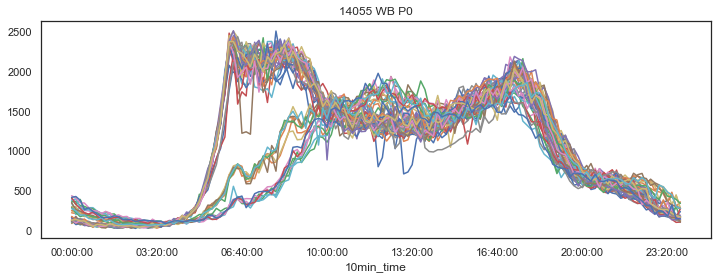

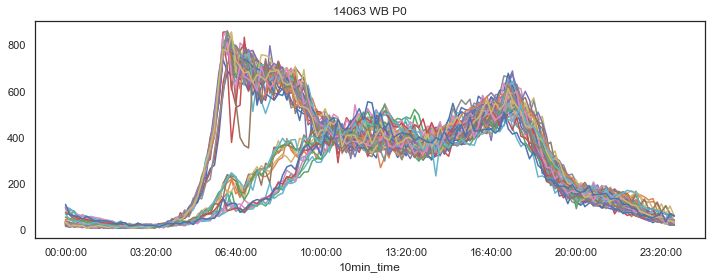

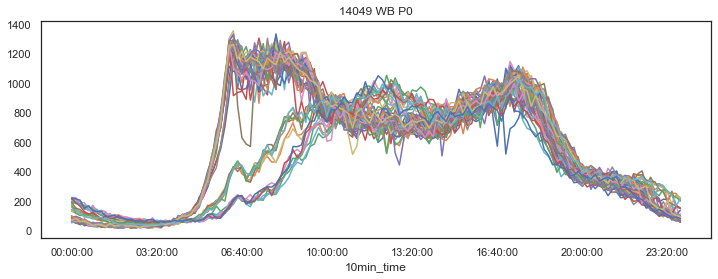

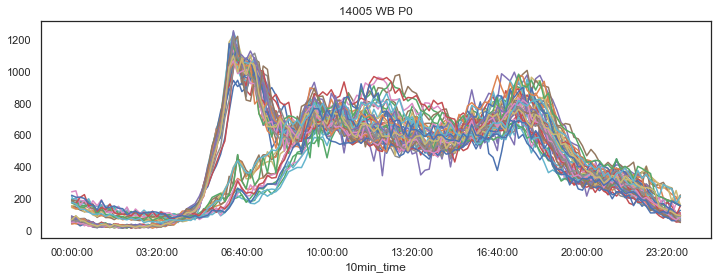

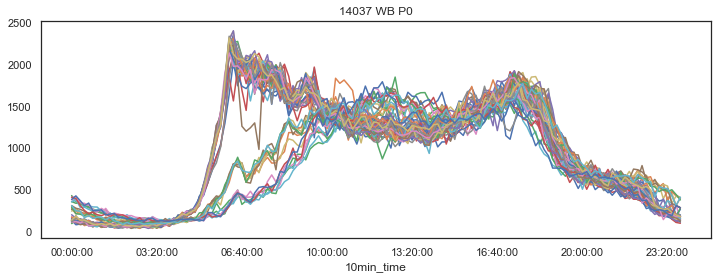

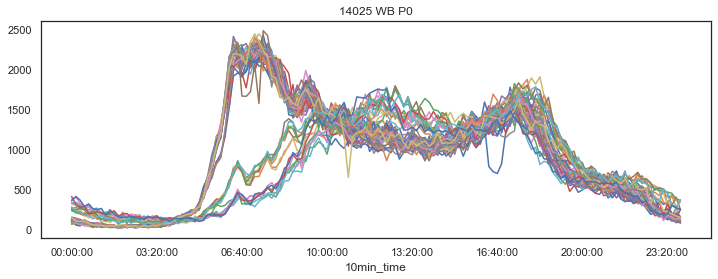

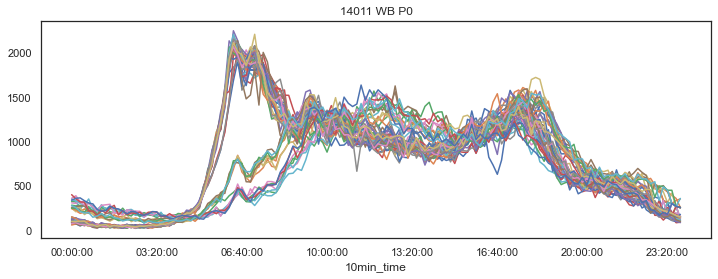

In [5]:
col_num = df.shape
dates = df['date'].drop_duplicates().values
for siteId in sites:
    site = df[df['site']==siteId]
    fig, axs = plt.subplots(figsize=(12, 4))
    for date in dates:
        subdata = site[site['date']==date]
        subdata.plot(x='10min_time', y='volume',ax=axs,legend=False, title = siteId)   
        xticks = axs.xaxis.get_major_ticks()        
        for ind, label in enumerate(xticks):
            if ind % 1 == 0:
                label.set_visible(True)
            else:
                label.set_visible(False) 
    plt.show()

14055 WB P0


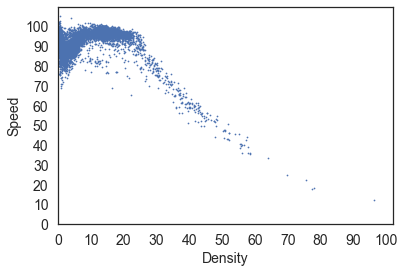

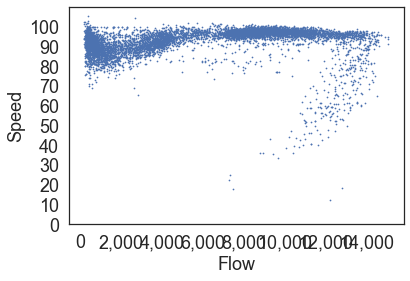

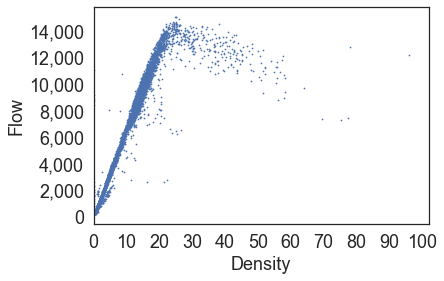

14063 WB P0


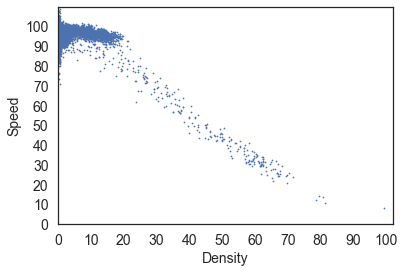

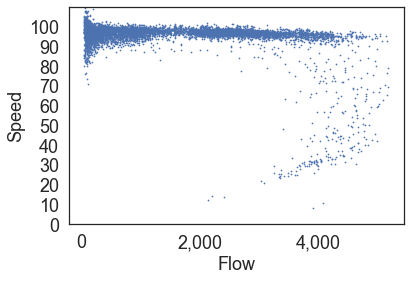

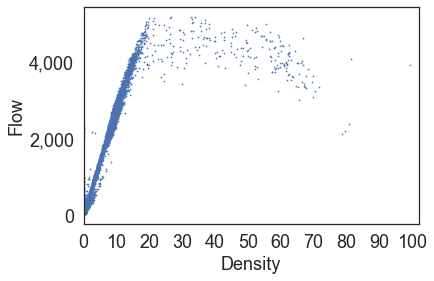

14049 WB P0


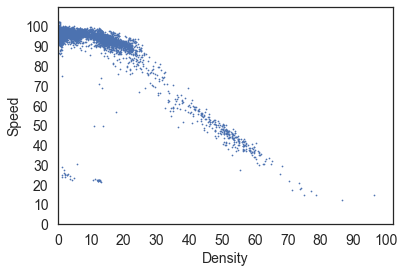

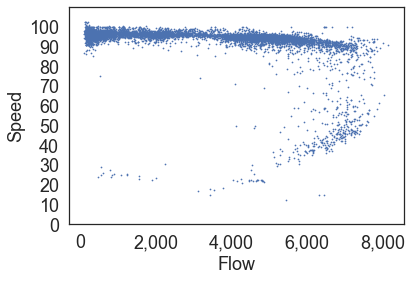

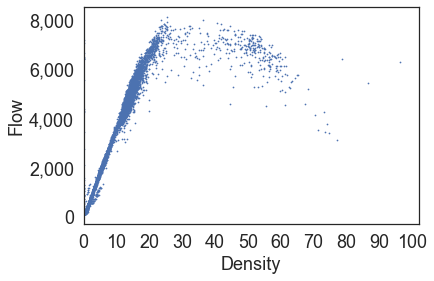

14005 WB P0


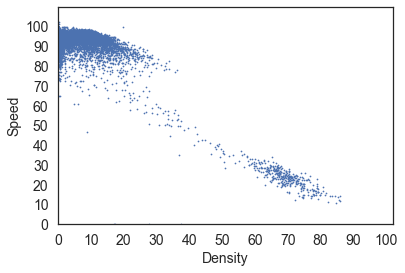

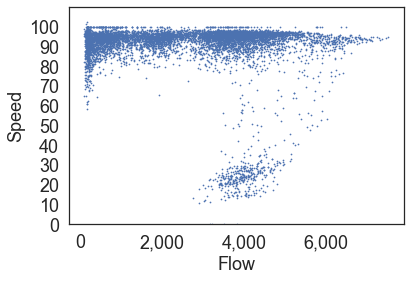

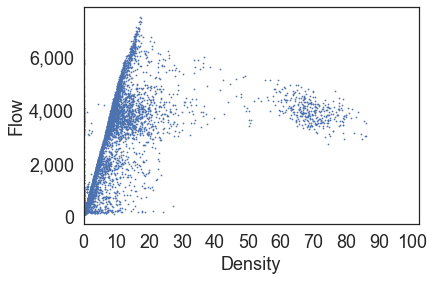

14037 WB P0


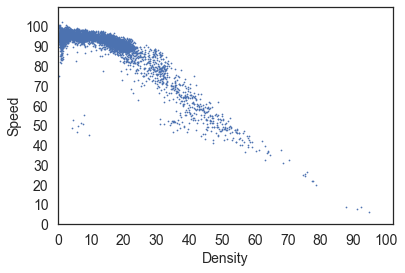

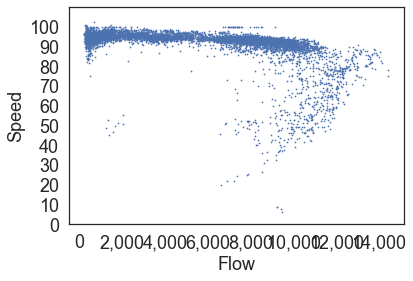

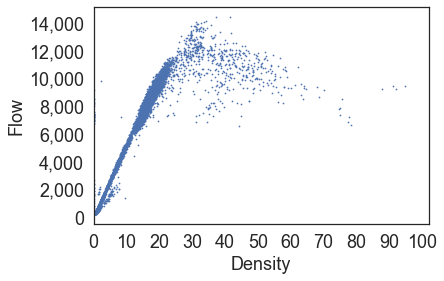

14025 WB P0


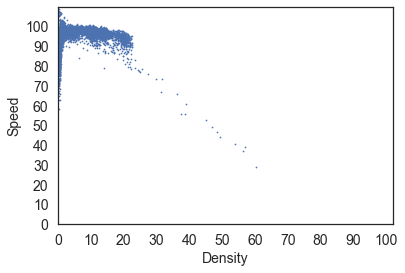

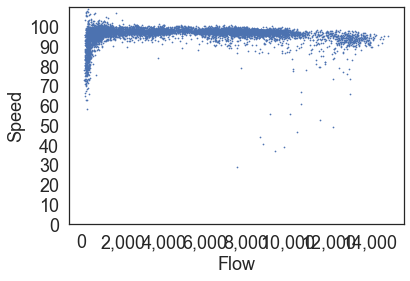

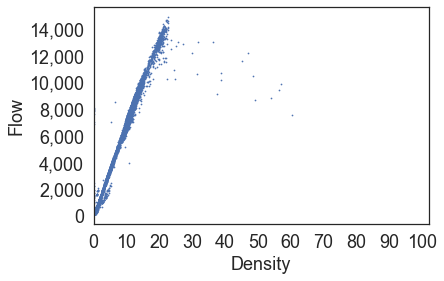

14011 WB P0


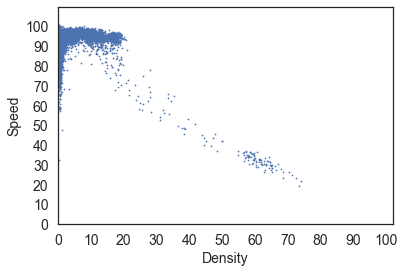

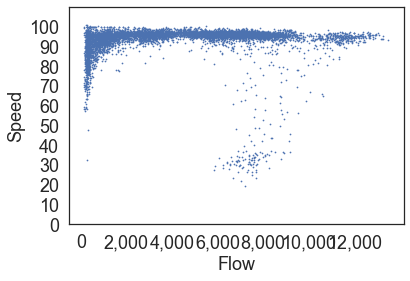

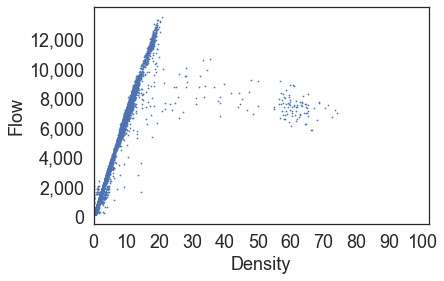

In [6]:

for site in sites:
    print(site)
    data = df[df['site']==site]# '14001 AL P0'
    f = data['volume']*6
    o = data['density']
    v = data['speed']
    fig, ax = plt.subplots()
    
    plt.scatter(o,v, marker='o',s=0.5)
    plt.xlabel("Density", size= 14)
    plt.ylabel("Speed", size= 14)
    plt.xlim([0,102])
    plt.ylim([0,110])
    plt.xticks([0,10,20,30,40,50,60,70,80,90,100], fontsize= 14)
    plt.tick_params(axis='both',which='minor',direction='out',bottom=True,length=50)
    plt.yticks([0,10,20,30,40,50,60,70,80,90,100], fontsize= 14)
    plt.show()
    
    x=range(0,int(f.max()),2000)
    xlabels = [f'{label:,}' for label in x]
    plt.xticks(x, xlabels, size= 18)
    plt.scatter(f,v, marker='o',s=0.5)
    plt.xlabel("Flow", size= 18)
    plt.ylabel("Speed", size= 18)
    plt.ylim([0,110])
    plt.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
    plt.yticks([0,10,20,30,40,50,60,70,80,90,100], fontsize= 18)
    plt.show()
    
    y=range(0,int(f.max()),2000)
    ylabels = [f'{label:,}' for label in y]
    plt.yticks(y, ylabels, size= 18)
    plt.scatter(o,f, marker='o',s=0.5)
    plt.xlabel("Density", size= 18)
    plt.ylabel("Flow", size= 18)
    plt.xlim([0,102])
    plt.xticks([0,10,20,30,40,50,60,70,80,90,100], fontsize= 18)
    plt.tick_params(axis='x',which='minor',direction='out',bottom=True,length=5)
    plt.show()


In [ ]:
# # %matplotlib widget
  

# sites = ['14005 WB P0']
# for site in sites:
#     print(site)
#     data = df[df['site']==site]# '14001 AL P0'
#     f = data['volume']*6
#     o = data['density']
#     v = data['speed']
#     #fig, ax = plt.subplots()

#     fig = plt.figure()
#     ax = fig.add_subplot(projection='3d')

#     ax.scatter(v, o, f, marker='o',s=0.5)
#     plt.xlim([0,102])
#     plt.ylim([0,110])
#     ax.set_xlabel('v Label')
#     ax.set_ylabel('o Label')
#     ax.set_zlabel('f Label')

#     plt.show()


In [28]:
def func(x, vf, kcr, alpha):
    speed = []
    for k in x:
        if k<kcr:
            s = vf * (1 - kcr/143) ** alpha
        else:
            s = vf * (1 - k/143) ** alpha
        speed.append(s)
    return speed

In [29]:
fdp = {}
parameters = {}

for site in sites:
    print(site)
    data0 = df[df['site']==site]
    data1 = data0[(data0['speed']<70) & (data0['occupancy']<5)]
    data = pd.concat([data0,data1]).drop_duplicates(keep=False)
    

    lowObservations = []
    for date in dates:
        if data[data['date']==date]['density'].max() < 40:
            lowObservations.append(date)

    filtered_dates = [x for x in dates if x not in lowObservations]

    for date in filtered_dates:
        # print(date)
        subdata = data[data['date']==date]
        subdata = subdata.dropna()
        xdata = subdata['density'].values
        ydata = subdata['speed'].values
        if len(xdata)!= len(ydata) or len(ydata)==0:  
            print('error')
        else:
            popt, pcov = curve_fit(func, xdata, ydata, p0=np.asarray([100,20,3]), maxfev=1000)
            # plt.scatter(xdata,ydata)
            # plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: vf=%f, kcr=%f, alpha=%f' % tuple(popt))
            # plt.legend()
            # plt.show()
            parameters[(site,date)] = popt
    
    min_date, min_similarity = 99999, 99999
    xdata = np.linspace(0, 89, 30)

    for date_0 in filtered_dates:
        ydata_0 = func(xdata, *parameters[(site,date_0)])
        similarity = 0
        for date in filtered_dates:
            ydata = func(xdata, *parameters[(site,date)])
            similarity += similaritymeasures.frechet_dist(ydata_0, ydata)
        if similarity < min_similarity:
            min_date = date_0
            min_similarity = similarity

    fdp[site] = (min_date,min_similarity)  

14055 WB P0
14063 WB P0
14049 WB P0
14005 WB P0
14037 WB P0
14025 WB P0
14011 WB P0


14055 WB P0


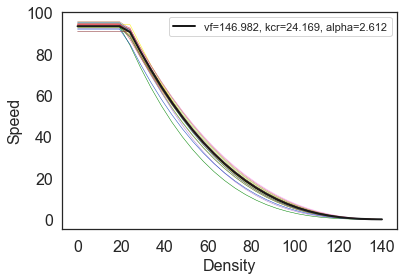

14063 WB P0


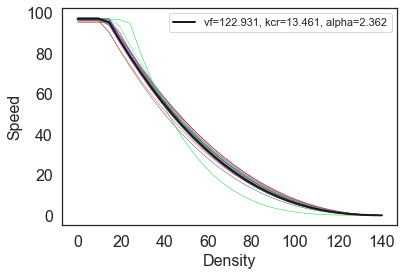

14049 WB P0


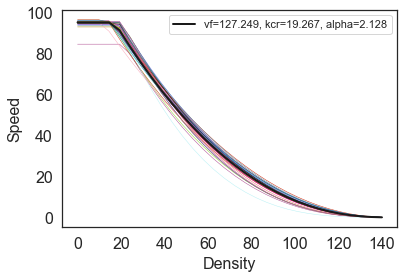

14005 WB P0


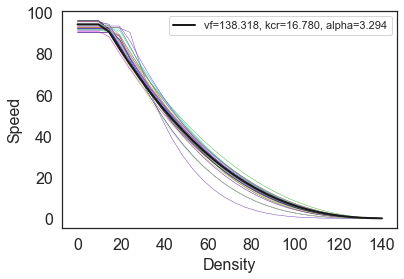

14037 WB P0


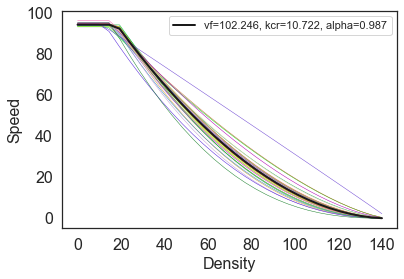

14025 WB P0


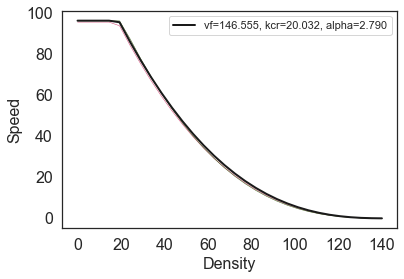

14011 WB P0


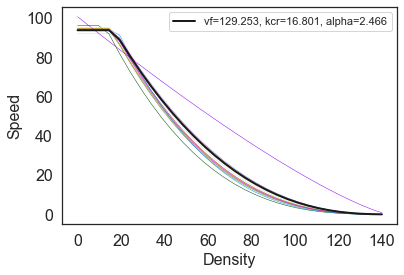

In [30]:
xdata = np.linspace(0, 140, len(ydata))

for site in sites:
    print(site)
    data0 = df[df['site']==site]
    data1 = data0[(data0['speed']<70) & (data0['occupancy']<5)]
    data = pd.concat([data0,data1]).drop_duplicates(keep=False)
    ax = plt.subplot(111)
    lowObservations = []
    for date in dates:
        if data[data['date']==date]['density'].max() < 40:
            lowObservations.append(date)

    filtered_dates = [x for x in dates if x not in lowObservations]
    
    for date in filtered_dates:
        
        plt.plot(xdata, func(xdata, *parameters[(site,date)]), c=np.random.rand(3,), linewidth=.5)
    plt.plot(xdata, func(xdata, *parameters[(site,fdp[site][0])]), 'k-', linewidth=2, label='vf=%.3f, kcr=%.3f, alpha=%.3f' % tuple(parameters[(site,date)]))
    plt.xlabel('Density')
    plt.ylabel('Speed')
    plt.legend()
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)
    plt.show()

In [10]:
for site in sites:
    kcr = parameters[(site,fdp[site][0])][1]
    print(site)
    df.loc[(df['site']==site) & (df['density']>=kcr),'state'] = 1
    df.loc[(df['site']==site) & (df['density']<kcr),'state'] = 0

14055 WB P0
14063 WB P0
14049 WB P0
14005 WB P0
14037 WB P0
14025 WB P0
14011 WB P0


In [13]:
df.to_csv("C:\\Data\\Processed_M3\\7sites_10min_time_final.csv",index=False)

In [12]:
for site in sites:
    p=parameters[(site,fdp[site][0])]
    print(site, p)

14055 WB P0 [148.18410648  22.7498973    2.67050509]
14063 WB P0 [124.74353046  13.57884178   2.51368169]
14049 WB P0 [127.21160325  17.038812     2.28564027]
14005 WB P0 [117.79786239  12.41618479   2.45737931]
14037 WB P0 [122.0328062   17.92713391   1.91982885]
14025 WB P0 [140.03795875  18.93639283   2.6356558 ]
14011 WB P0 [127.45493667  16.67790267   2.48290265]


In [33]:
vf,kcrt,alpha =[],[],[]
for site in sites:
    p=parameters[(site,fdp[site][0])]
    print(site, p)
    vf.append(p[0])
    kcrt.append(p[1])
    alpha.append(p[2])

14055 WB P0 [148.18410648  22.7498973    2.67050509]
14063 WB P0 [124.74353046  13.57884178   2.51368169]
14049 WB P0 [127.21160325  17.038812     2.28564027]
14005 WB P0 [117.79786239  12.41618479   2.45737931]
14037 WB P0 [122.0328062   17.92713391   1.91982885]
14025 WB P0 [140.03795875  18.93639283   2.6356558 ]
14011 WB P0 [127.45493667  16.67790267   2.48290265]


In [35]:
import statistics as st
print(st.stdev(vf))
print(st.stdev(kcrt))
print(st.stdev(alpha))

10.682961795302052
3.427252235660806
0.25544751081465383


In [37]:
print(st.mean(vf))
print(st.mean(kcrt))
print(st.mean(alpha))

129.63754345729507
17.046452181896836
2.423656235343711
